In [3]:
import argparse
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import pandas as pd
from datetime import datetime
from matplotlib.backends.backend_pdf import PdfPages
import xbpch
from glob import glob
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from dask.diagnostics import ProgressBar
from matplotlib import colorbar, colors

OLD = '/home/brittany/Documents/HG/pythonHgBenchmark/trac_avg.geosfp_2x25_Hg.v12-01.bpch'
NEW = '/home/brittany/Documents/HG/pythonHgBenchmark/trac_avg.geosfp_2x25_Hg.v12-01.new.bpch'
OLD_ds = xbpch.open_bpchdataset(OLD)
NEW_ds = xbpch.open_bpchdataset(NEW)



/home/brittany/anaconda3/envs/geoschem/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/brittany/anaconda3/envs/geoschem/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/brittany/anaconda3/envs/geoschem/lib/python3.6/site-packages/pandas/io/parsers.py:710: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


In [4]:
#Will need a unit input conversion 
def HgMeanSurface (Title, Units, Variable1, Unit_Conversion1,  Variable2=0, Unit_Conversion2=0):
    OLD_V1=((OLD_ds[Variable1].isel(lev=0).mean('time')) * Unit_Conversion1) 
    if Variable2!=0:
        OLD_V2=((OLD_ds[Variable2].isel(lev=0).mean('time'))* Unit_Conversion2 ) 
    else:
        OLD_V2=0
    OLD_sum= OLD_V1 + OLD_V2
    
    NEW_V1=((NEW_ds[Variable1].isel(lev=0).mean('time')) * Unit_Conversion1) 
    if Variable2!=0:
        NEW_V2=((NEW_ds[Variable2].isel(lev=0).mean('time')) * Unit_Conversion2) 
    else:
        NEW_V2=0
    NEW_sum= NEW_V1 + NEW_V2
    
    Abs_diff = NEW_sum - OLD_sum
    Perc_diff = (Abs_diff / OLD_sum)*100

    
  
    Abs_MaxVal= np.max(np.abs(Abs_diff))
    Perc_MaxVal= np.max(np.abs(Perc_diff))

 

    Levels=(37, 75, 112, 150)
    
    
    
    
    Old = plt.figure()
    ax = Old.add_subplot(111, projection=ccrs.PlateCarree())
    im=OLD_sum.plot.contourf(x='lon',y='lat',ax=ax, transform=ccrs.PlateCarree(), cmap='viridis', title= (Title), 
                         cbar_kwargs={'orientation':'horizontal',
                                      'ticklocation':'auto',
                                      'label':"Not Linear " + Units})
   
    
    plt.title(' Reference Model Version: '+Title)             
    ax.coastlines()
 
    plt.show()

    
    
    
    New = plt.figure()
    ax = New.add_subplot(111, projection=ccrs.PlateCarree())
    im= NEW_sum.plot.contourf(x='lon',y='lat', cmap='viridis', transform=ccrs.PlateCarree(), ax=ax,
                             cbar_kwargs={'orientation':'horizontal',
                                      'ticklocation':'auto',
                                      'label':"Not Linear " + Units})
    plt.title('New Model Version: '+ Title)
    

    ax.coastlines()
    plt.show()


    #Abs_max= np.max(Abs_diff)
    #Per_max= np.max(Perc_diff)

    #Absolute Difference plot
    Abs = plt.figure()
    ax = Abs.add_subplot(111, projection=ccrs.PlateCarree())
    im= Abs_diff.plot.imshow(x='lon',y='lat', ax=ax,transform=ccrs.PlateCarree(), cmap='RdBu', vmin=(-Abs_MaxVal), vmax=(Abs_MaxVal),
                          cbar_kwargs={'orientation':'horizontal',
                                      'ticklocation':'auto',
                                      'label': Units})

    plt.title("Absolute Difference")



    ax.coastlines()
    plt.show()




    # Percent Difference Graph

    Perc = plt.figure()
    ax = Perc.add_subplot(111, projection=ccrs.PlateCarree())
    im= Perc_diff.plot.imshow(x='lon',y='lat',ax=ax,transform=ccrs.PlateCarree(), cmap='RdBu', vmin=(-Perc_MaxVal), vmax=(Perc_MaxVal),
                        cbar_kwargs={'orientation':'horizontal',
                                      'ticklocation':'auto',
                                      'label':"%" })
    plt.title("Percent Difference (%)")

    ax.coastlines()
    plt.show()
    return Old, New, Abs, Perc
    



/home/brittany/anaconda3/envs/geoschem/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/brittany/anaconda3/envs/geoschem/lib/python3.6/site-packages/matplotlib/contour.py:1004: UserWarning: The following kwargs were not used by contour: 'title'
  s)


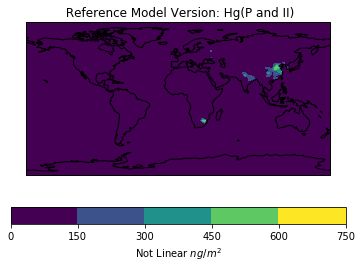

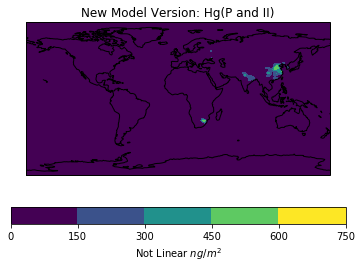

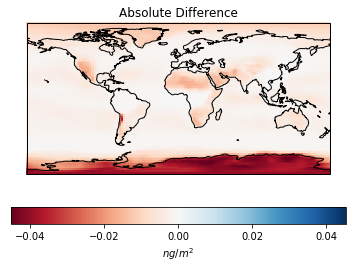

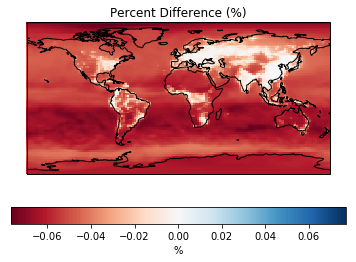

(<Figure size 432x288 with 2 Axes>,
 <Figure size 432x288 with 2 Axes>,
 <Figure size 432x288 with 2 Axes>,
 <Figure size 432x288 with 2 Axes>)

In [5]:
HgMeanSurface("Hg(P and II)", "$ng/m^2$", 'IJ_AVG_S_HgP', 8.93*1e3, 'IJ_AVG_S_Hg2', 8.93*1e3,)
    

In [6]:
def HgMeanSurface (Title, Units, Variable, Unit_Conversion):
    
    
    if type(Variable) is list and len(Variable) > 1:
        OLD_sum=0
        for i in range(len(Variable)):
            tmpVar1 = ((OLD_ds[Variable[i]].isel(lev=0).mean('time')) * Unit_Conversion)
            OLD_sum = OLD_sum + tmpVar1
    else:
        OLD_sum = ((OLD_ds[Variable].isel(lev=0).mean('time')) * Unit_Conversion) 

    if type(Variable) is list and len(Variable) > 1:
        NEW_sum=0
        for i in range(len(Variable)):
            tmpVar2 = ((NEW_ds[Variable[i]].isel(lev=0).mean('time')) * Unit_Conversion)
            NEW_sum = NEW_sum + tmpVar2
    else:
        NEW_sum = ((NEW_ds[Variable].isel(lev=0).mean('time')) * Unit_Conversion)
    
    
    
    #Absolute Value stuff
    Abs_diff = NEW_sum - OLD_sum
    
    Perc_diff = (Abs_diff / OLD_sum)*100
    Abs_MaxVal= np.max(np.abs(Abs_diff))
    Perc_MaxVal= np.max(np.abs(Perc_diff))
    #Plot Old Graph    
    Old = plt.figure()
    ax = Old.add_subplot(111, projection=ccrs.PlateCarree())
    im=OLD_sum.plot.contourf(x='lon',y='lat',ax=ax, transform=ccrs.PlateCarree(), cmap='viridis', title= (Title), 
                         cbar_kwargs={'orientation':'horizontal',
                                      'ticklocation':'auto',
                                      'label':"Not Linear " + Units})  
    plt.title(' Reference Model Version: '+Title)             
    ax.coastlines()
    plt.show()
    #Plot New Graph     
    New = plt.figure()
    ax = New.add_subplot(111, projection=ccrs.PlateCarree())
    im= NEW_sum.plot.contourf(x='lon',y='lat', cmap='viridis', transform=ccrs.PlateCarree(), ax=ax,
                             cbar_kwargs={'orientation':'horizontal',
                                      'ticklocation':'auto',
                                      'label':"Not Linear " + Units})
    plt.title('New Model Version: '+ Title)
    ax.coastlines()
    plt.show()
    #Absolute Difference plot
    Abs = plt.figure()
    ax = Abs.add_subplot(111, projection=ccrs.PlateCarree())
    im= Abs_diff.plot.imshow(x='lon',y='lat', ax=ax,transform=ccrs.PlateCarree(), cmap='RdBu', vmin=(-Abs_MaxVal), vmax=(Abs_MaxVal),
                          cbar_kwargs={'orientation':'horizontal',
                                      'ticklocation':'auto',
                                      'label': Units})
    plt.title("Absolute Difference")
    ax.coastlines()
    plt.show()
    # Percent Difference Graph
    Perc = plt.figure()
    ax = Perc.add_subplot(111, projection=ccrs.PlateCarree())
    im= Perc_diff.plot.imshow(x='lon',y='lat',ax=ax,transform=ccrs.PlateCarree(), cmap='RdBu', vmin=(-Perc_MaxVal), vmax=(Perc_MaxVal),
                        cbar_kwargs={'orientation':'horizontal',
                                      'ticklocation':'auto',
                                      'label':"%" })
    plt.title("Percent Difference (%)")
    ax.coastlines()
    plt.show()
    return Old, New, Abs, Perc
    



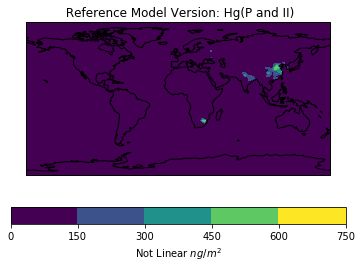

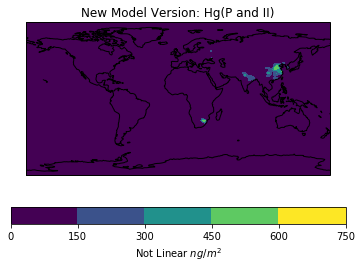

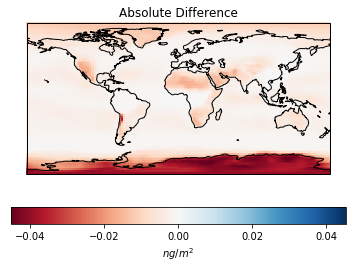

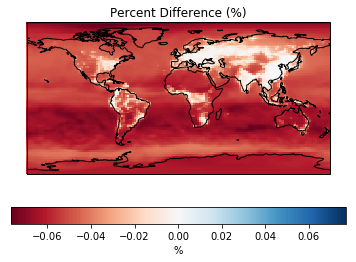

(<Figure size 432x288 with 2 Axes>,
 <Figure size 432x288 with 2 Axes>,
 <Figure size 432x288 with 2 Axes>,
 <Figure size 432x288 with 2 Axes>)

In [7]:
HgMeanSurface("Hg(P and II)", "$ng/m^2$", ['IJ_AVG_S_HgP','IJ_AVG_S_Hg2'] ,8.93*1e3)
    

In [34]:
def HgMeanSurface (Title, Units, Variable, Unit_Conversion):
    
    
    if type(Variable) is list and len(Variable) > 1:
        OLD_sum=0
        for i in range(len(Variable)):
            tmpVar1 = ((OLD_ds[Variable[i]].isel(lev=0).mean('time')) * Unit_Conversion)
            OLD_sum = OLD_sum + tmpVar1
    else:
        OLD_sum = ((OLD_ds[Variable].isel(lev=0).mean('time')) * Unit_Conversion) 

    if type(Variable) is list and len(Variable) > 1:
        NEW_sum=0
        for i in range(len(Variable)):
            tmpVar2 = ((NEW_ds[Variable[i]].isel(lev=0).mean('time')) * Unit_Conversion)
            NEW_sum = NEW_sum + tmpVar2
    else:
        NEW_sum = ((NEW_ds[Variable].isel(lev=0).mean('time')) * Unit_Conversion)
    
    
    
    #Absolute Value stuff
    Abs_diff = NEW_sum - OLD_sum
    
    Perc_diff = (Abs_diff / OLD_sum)*100
    Abs_MaxVal= np.max(np.abs(Abs_diff))
    Perc_MaxVal= np.max(np.abs(Perc_diff))
    
    
    
    #Plot Old Graph    
    ax = plt.subplot(221, projection=ccrs.PlateCarree())
    im=OLD_sum.plot.contourf(x='lon',y='lat',ax=ax, transform=ccrs.PlateCarree(), cmap='viridis', title= (Title), 
                         cbar_kwargs={'orientation':'horizontal',
                                      'ticklocation':'auto',
                                      'label':"Not Linear " + Units})  
    plt.title(' Reference Model Version: '+Title)             
    ax.coastlines()
    
    
    
    #Plot New Graph     
    ax = plt.subplot(222, projection=ccrs.PlateCarree())
    im= NEW_sum.plot.contourf(x='lon',y='lat', cmap='viridis', transform=ccrs.PlateCarree(), ax=ax,
                             cbar_kwargs={'orientation':'horizontal',
                                      'ticklocation':'auto',
                                      'label':"Not Linear " + Units})
    plt.title('New Model Version: '+ Title)
    ax.coastlines()
    
    #Absolute Difference plot
    ax = plt.subplot(223, projection=ccrs.PlateCarree())
    im= Abs_diff.plot.imshow(x='lon',y='lat', ax=ax,transform=ccrs.PlateCarree(), cmap='RdBu', vmin=(-Abs_MaxVal), vmax=(Abs_MaxVal),
                          cbar_kwargs={'orientation':'horizontal',
                                      'ticklocation':'auto',
                                      'label': Units})
    plt.title("Absolute Difference")
    ax.coastlines()
     
    # Percent Difference Graph
    
    ax = plt.subplot(224, projection=ccrs.PlateCarree())
    im= Perc_diff.plot.imshow(x='lon',y='lat',ax=ax,transform=ccrs.PlateCarree(), cmap='RdBu', vmin=(-Perc_MaxVal), vmax=(Perc_MaxVal),
                        cbar_kwargs={'orientation':'horizontal',
                                      'ticklocation':'auto',
                                      'label':"%" })
    plt.title("Percent Difference (%)")
    ax.coastlines()
    ab= plt.show()
    return ab
    


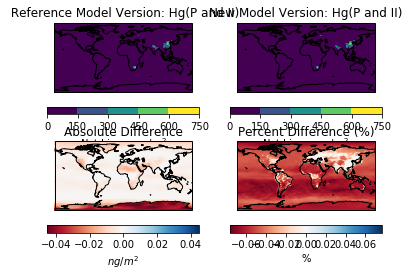

In [35]:
HgMeanSurface("Hg(P and II)", "$ng/m^2$", ['IJ_AVG_S_HgP','IJ_AVG_S_Hg2'] ,8.93*1e3)